['asteroids', 'mercury', 'venus', 'moon', 'neptune', 'spiral', 'saturn', 'jupiter', 'elliptical', 'earth', 'uranus', 'mars']
0


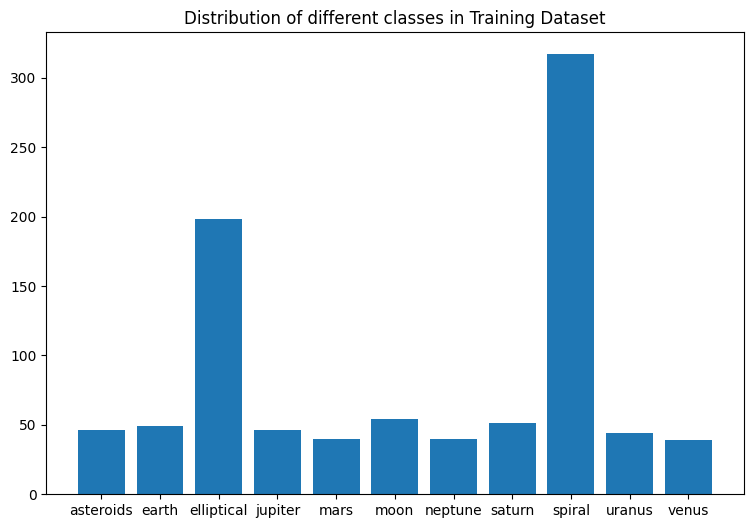

In [2]:
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

warnings.filterwarnings('ignore')
# Get all the paths
data_directory = os.listdir('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data')
print(data_directory)
path, dirs, files = next(os.walk("/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data"))
file_count = len(files)
print(file_count)

test_data = os.listdir("/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test_data")


# Making new base directory
original_dataset_dir = "/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data"
base_dir = "/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining"


image_folder = ['asteroids', 'earth','elliptical', 'jupiter', 'mars', 'moon', 'neptune', 'saturn', 'spiral', 'uranus', 'venus']

nimgs = {}
for i in image_folder:
    nimages = len(os.listdir("/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data/"+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Training Dataset')
plt.show()

In [17]:
for i in ['asteroids', 'earth','elliptical', 'jupiter', 'mars', 'mercury', 'moon', 'neptune', 'saturn', 'spiral', 'uranus', 'venus']:
    print('Training {} images are: '.format(i)+str(len(os.listdir('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data/'+i+'/'))))
     

Training asteroids images are: 46
Training earth images are: 49
Training elliptical images are: 198
Training jupiter images are: 46
Training mars images are: 40
Training mercury images are: 63
Training moon images are: 54
Training neptune images are: 40
Training saturn images are: 51
Training spiral images are: 317
Training uranus images are: 44
Training venus images are: 39


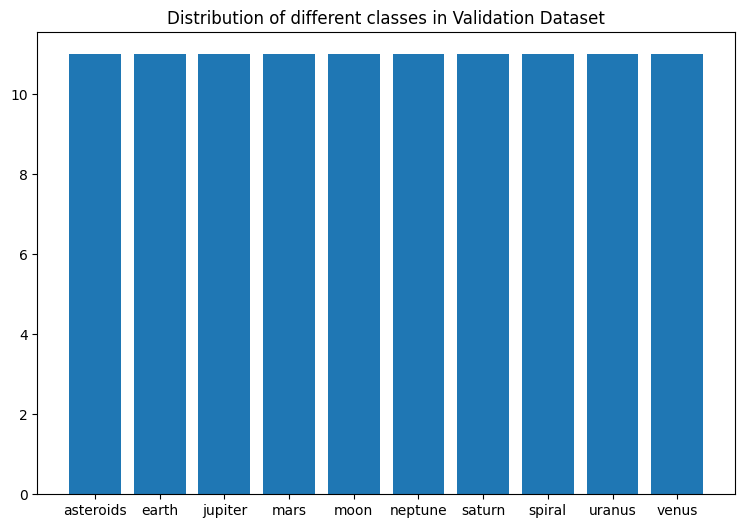

In [25]:

image_folder = ['asteroids', 'earth', 'jupiter', 'mars', 'moon', 'neptune', 'saturn', 'spiral', 'uranus', 'venus']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test_data/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in Validation Dataset')
plt.show()
     

In [26]:
for i in ['asteroids', 'earth', 'jupiter', 'mars', 'moon', 'neptune', 'saturn', 'spiral', 'uranus', 'venus']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir('/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test_data/'+i+'/'))))

Valid asteroids images are: 11
Valid earth images are: 11
Valid jupiter images are: 11
Valid mars images are: 11
Valid moon images are: 11
Valid neptune images are: 11
Valid saturn images are: 11
Valid spiral images are: 11
Valid uranus images are: 11
Valid venus images are: 11


In [18]:
import tensorflow as tf
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [19]:
img_width=256; img_height=256
batch_size=16

In [20]:
TRAINING_DIR = '/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/training_data/'

train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                   rotation_range=30,
                                   zoom_range=0.4,
                                   horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    target_size=(img_height, img_width))
     

Found 987 images belonging to 12 classes.


In [ ]:
VALIDATION_DIR = '/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/test_data/'

validation_datagen = ImageDataGenerator(rescale = 1/255.0)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=batch_size,
                                                              class_mode='categorical',
                                                              target_size=(img_height, img_width)
                                                             )
     

In [21]:
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model
best_model_file = '/Users/kevinmathew/Documents/UoL CNN/hub/examples/image_retraining/CNN_best_weights.h5'
best_model = ModelCheckpoint(best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [22]:

model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)), MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'), MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(12, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 conv2d_30 (Conv2D)          (None, 58, 58, 64)       

In [23]:

model.compile(optimizer='Adam', 
              loss='categorical_crossentropy', 
              metrics =['accuracy'])

In [24]:

history = model.fit(train_generator,
                              epochs=30,
                              verbose=1,
                              callbacks = [best_model]
                              )

Epoch 1/30
62/62 [==============================] - 24s 311ms/step - loss: 2.3739 - accuracy: 0.2898
Epoch 2/30
62/62 [==============================] - 20s 318ms/step - loss: 1.9686 - accuracy: 0.3262
Epoch 3/30
62/62 [==============================] - 21s 338ms/step - loss: 1.8166 - accuracy: 0.3313
Epoch 4/30
62/62 [==============================] - 21s 335ms/step - loss: 1.6650 - accuracy: 0.3587
Epoch 5/30
62/62 [==============================] - 20s 326ms/step - loss: 1.6169 - accuracy: 0.3779
Epoch 6/30
62/62 [==============================] - 23s 372ms/step - loss: 1.5952 - accuracy: 0.3951
Epoch 7/30
62/62 [==============================] - 21s 328ms/step - loss: 1.5790 - accuracy: 0.3921
Epoch 8/30
62/62 [==============================] - 20s 322ms/step - loss: 1.4474 - accuracy: 0.4306
Epoch 9/30
62/62 [==============================] - 22s 347ms/step - loss: 1.4704 - accuracy: 0.4245
Epoch 10/30
62/62 [==============================] - 21s 335ms/step - loss: 1.4533 - accura

In [ ]:

acc=history.history['accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and  accuracy')
plt.legend(loc='lower right')
plt.show()